# Week - 

# 5. Write a program to demonstrate to remove outliers in a dataset 

In [34]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')
# Load the dataset
data = pd.read_csv("C:/Users/MANASA N S/OneDrive/ドキュメント/DATASETS CSV FORMATS/athelete/athlete_events 2.csv") 

# Display the first 10 rows of the dataset
data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [36]:
# Removing missing values in Height and Weight columns

data['Height'].fillna(data['Height'].mean(), inplace=True) 
data['Weight'].fillna(data['Weight'].mean(), inplace=True) 
data['Age'].fillna(data['Age'].mean(), inplace = True)


In [38]:
# Check the info of the DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     271116 non-null  float64
 4   Height  271116 non-null  float64
 5   Weight  271116 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [40]:
data.isna().sum()

ID             0
Name           0
Sex            0
Age            0
Height         0
Weight         0
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

In [42]:
data.shape

(271116, 15)

In [44]:
data.duplicated().sum()

1385

In [46]:
data.drop_duplicates(keep = 'first', inplace = True)

In [48]:
data.duplicated().sum()

0

In [52]:
data.dropna(how='any', axis = 0, inplace = True)

In [54]:
data.shape

(39772, 15)

In [56]:
# Check the skewness of Weight
print("Skewness of Weight before removal:", data['Weight'].skew())


Skewness of Weight before removal: 0.9402005644805969


Text(0, 0.5, 'Frequency')

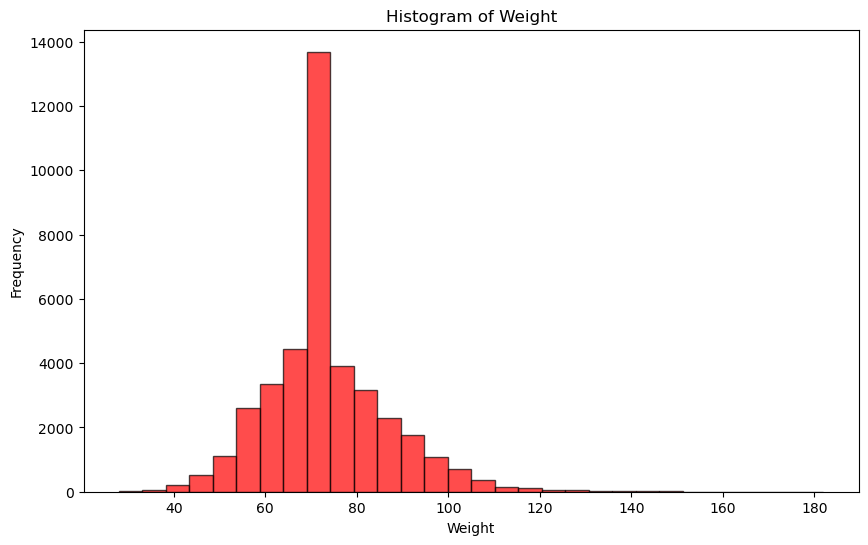

In [60]:
plt.figure(figsize = (10,6))
plt.hist(data['Weight'], bins=30, color='red', edgecolor='black', alpha = 0.7)
plt.title('Histogram of Weight')
plt.xlabel('Weight')
plt.ylabel('Frequency')


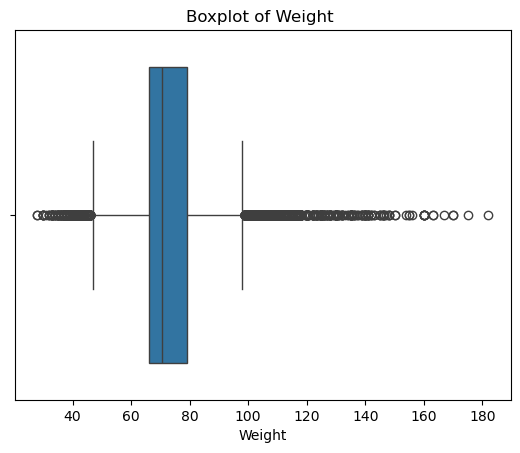

In [62]:
sns.boxplot(x=data['Weight'])
plt.title('Boxplot of Weight ')
plt.show()

In [64]:
# Calculate IQR for Weight
q1 = data['Weight'].quantile(0.25) 
q3 = data['Weight'].quantile(0.75) 
IQR = q3 - q1 

# Calculate lower and upper bounds
lower = q1 - (1.5 * IQR) 
upper = q3 + (1.5 * IQR) 

# Remove outliers using IQR
data['Weight'] = np.where(data['Weight'] > upper, upper, 
                          np.where(data['Weight'] < lower, lower, data['Weight']))


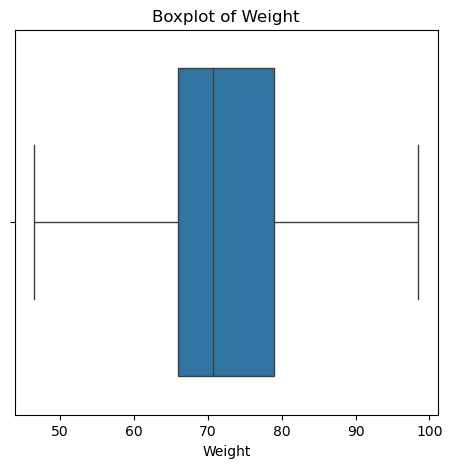

In [66]:
# Plot histogram and boxplot after removing outliers
plt.figure(figsize=(12, 5))


plt.subplot(1, 2, 2)
sns.boxplot(x=data['Weight'])
plt.title('Boxplot of Weight')

plt.show()


In [68]:
# Check the skewness of Weight after outlier removal
print("Skewness of Weight after removal:", data['Weight'].skew())


Skewness of Weight after removal: 0.3007967974433836
